In [1]:
#Estas son las librerias que vamos a utilizar para el analisis de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
df = pd.read_csv('Train.csv')
df.drop(columns=['uniqueid', 'year'],inplace=True)
data = df.copy()
data

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
data.isnull().sum()

country                   0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


Country

In [5]:
data.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [6]:
categorical_cols = ['country']

Bank Account == Target

In [7]:
data.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
data['bank_account']= binary_encoder.fit_transform(data[['bank_account']])
df['bank_account']= binary_encoder.fit_transform(df[['bank_account']])

data[['bank_account']].head()

,bank_account
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


Cellphone access

In [9]:
data.cellphone_access.value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [10]:
categorical_cols.append('cellphone_access')

Location type

In [11]:
data.location_type.value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [12]:
categorical_cols.append('location_type')

Household Size

In [13]:
data.household_size.value_counts()

2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64

Age of respondent

In [14]:
data[['age_of_respondent']].sort_values(by='age_of_respondent', ascending=True)

,age_of_respondent
20667,16
10416,16
10428,16
13720,16
7202,16
...,...
20508,100
20945,100
14804,100
18698,100


gender_of_respondent    

In [15]:
data.gender_of_respondent.value_counts()

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

In [16]:
categorical_cols.append('gender_of_respondent')

relationship_with_head

In [17]:
data.relationship_with_head.value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

In [18]:
categorical_cols.append('relationship_with_head')

marital_status

In [19]:
data.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [20]:
categorical_cols.append('marital_status')

education_level         

In [21]:
data.education_level.value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

In [22]:
categorical_cols.append('education_level')

job_type                

In [23]:
data.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

In [24]:
categorical_cols.append('job_type')
data.job_type = data.job_type.astype(object)

# Encoding 
Encoding de variables categoricas no binarias

In [25]:
categorical_cols

['country',
 'cellphone_access',
 'location_type',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [26]:
for col in categorical_cols:
    dummy_table = pd.get_dummies(data[col], drop_first= True,prefix = col)
    data = pd.concat([data, dummy_table], axis=1)
    data.drop(columns=col, inplace=True)

In [27]:
data

,bank_account,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,cellphone_access_Yes,location_type_Urban,gender_of_respondent_Male,relationship_with_head_Head of Household,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.0,3,24,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,5,70,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1.0,5,26,0,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,5,34,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.0,8,26,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0.0,4,48,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23520,0.0,2,27,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
23521,0.0,5,27,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23522,0.0,7,30,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
data.apply(np.var).sort_values(ascending=False)

age_of_respondent                                  272.917596
household_size                                       4.962048
marital_status_Married/Living together               0.248146
education_level_Primary education                    0.248087
relationship_with_head_Head of Household             0.247935
gender_of_respondent_Male                            0.241917
location_type_Urban                                  0.237962
country_Rwanda                                       0.233442
marital_status_Single/Never Married                  0.224193
country_Tanzania                                     0.202220
relationship_with_head_Spouse                        0.200344
job_type_Self employed                               0.198759
cellphone_access_Yes                                 0.191453
job_type_Informally employed                         0.181318
job_type_Farming and Fishing                         0.177798
education_level_Secondary education                  0.147292
bank_acc

# Reduccion de la dimensionalidad usando PCA


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
std_sclr = StandardScaler()
df_std = pd.DataFrame(std_sclr.fit_transform(data), index=data.index, columns=data.columns)

Number of components explaining 95% variance: 24


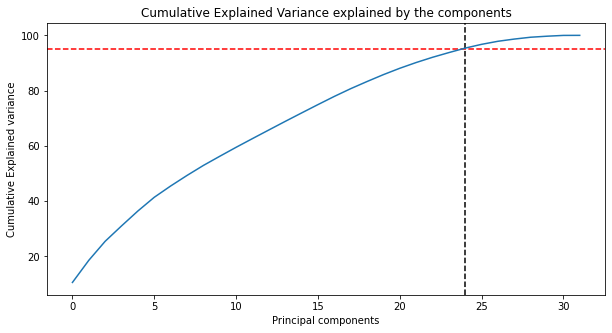

In [30]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np

pca = PCA()
pca.fit(df_std)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pca_k_components = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(pca_k_components))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=pca_k_components, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [31]:
np.set_printoptions(precision=6, suppress=True)
pca.explained_variance_ratio_

array([0.105939, 0.080102, 0.068799, 0.055658, 0.053981, 0.049593,
       0.040794, 0.038166, 0.036192, 0.033134, 0.03254 , 0.031488,
       0.031191, 0.031043, 0.03048 , 0.03023 , 0.029648, 0.027982,
       0.025913, 0.024924, 0.022999, 0.020795, 0.018949, 0.017027,
       0.016263, 0.013614, 0.011098, 0.008012, 0.006659, 0.003707,
       0.002878, 0.000206])

# Train test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('bank_account',axis = 1), df['bank_account'])


# Hipotesis nula - variable objetivo

In [33]:
df.bank_account.value_counts(normalize=True)

0.0    0.859208
1.0    0.140792
Name: bank_account, dtype: float64

# Modelo usando Pipeline y Grid Search

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE




In [35]:
df.columns

Index(['country', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [36]:
# Separamos los procesamientos de las columnas categóricas y numéricas
categorical_features = [col for col in X_train.columns if X_train[col].dtype == object or X_train[col].dtype == 'category']
numeric_features = [col for col in X_train.columns if X_train[col].dtype == 'int64']

# Pipeline para cada tipo de columna con un preprocesamiento diferente
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop='first'))])


# creamos el column transformer usando los pipelines de columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

## Logistic Regression

In [42]:
# Instanciamos los clasificadores
log = LogisticRegression(random_state= 42)

# Pipeline Log  
pipe = Pipeline([
  ("preprocessor", preprocessor),
  ('classifier', log)])

param_grid = [{'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
              'classifier': [log],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10],
              'classifier__penalty': ['l2','none']}]

kf = KFold(n_splits=3, shuffle = True)

# Grid Search con Cross validation
gridcv_log = GridSearchCV(pipe, param_grid, cv=kf, verbose=1, n_jobs = 7)

gridcv_log.fit(X_train, y_train)
gridcv_log.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\alejo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('classifier',
                 LogisticRegression(C=0.001, penalty='none', random_state=42))])

In [43]:
print("Best hyperparameters:", gridcv_log.best_params_)

Best hyperparameters: {'classifier': LogisticRegression(C=0.001, penalty='none', random_state=42), 'classifier__C': 0.001, 'classifier__penalty': 'none', 'preprocessor__num__scaler': StandardScaler()}


In [44]:
y_pred_log = gridcv_log.predict(X_test)
log_accuracy_score = metrics.accuracy_score(y_test, y_pred_log)
log_recall_score = metrics.recall_score(y_test, y_pred_log)
log_precision_score = metrics.precision_score(y_test, y_pred_log)

## RandomForestClassifier

In [45]:
# Instanciamos los clasificadores
rf = RandomForestClassifier(random_state= 42)

# Pipeline RFC  
pipe = Pipeline([
  ("preprocessor", preprocessor),
  ('classifier', rf)])

param_grid = [{'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
              'classifier__max_depth': [3, 5, 7, None],
              'classifier__max_features': ['log2', 'sqrt'],
              'classifier__class_weight': ['balanced', 'balanced_subsample', None],
              'classifier__n_estimators': [100, 250]}]

kf = KFold(n_splits=3, shuffle = True)

# Grid Search con Cross validation
gridcv_rf = GridSearchCV(pipe, param_grid, cv=kf, verbose=1, n_jobs = 7)

gridcv_rf.fit(X_train, y_train)
gridcv_rf.best_estimator_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=250,
                                        random_state=42))])

In [46]:
print("Best hyperparameters:", gridcv_rf.best_params_)

Best hyperparameters: {'classifier__class_weight': None, 'classifier__max_depth': 7, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 250, 'preprocessor__num__scaler': StandardScaler()}


In [47]:
y_pred_rf = gridcv_rf.predict(X_test)
rf_accuracy_score = metrics.accuracy_score(y_test, y_pred_rf)
rf_recall_score = metrics.recall_score(y_test, y_pred_rf)
rf_precision_score = metrics.precision_score(y_test, y_pred_rf)

## AdaBoostClassifier

In [48]:
# Instanciamos los clasificadores
ada = AdaBoostClassifier(random_state= 42)

# Pipeline ADA  
pipe = Pipeline([
  ("preprocessor", preprocessor),
  ('classifier', ada)])

param_grid = [{'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
              'classifier__n_estimators': [50, 100, 300],
              'classifier__learning_rate':[0.01, 0.1]}]

kf = KFold(n_splits=3, shuffle = True)

# Grid Search con Cross validation
gridcv_ada = GridSearchCV(pipe, param_grid, cv=kf, verbose=1, n_jobs = 7)

gridcv_ada.fit(X_train, y_train)
gridcv_ada.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=300,
                                    random_state=42))])

In [49]:
print("Best hyperparameters:", gridcv_ada.best_params_)

Best hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 300, 'preprocessor__num__scaler': StandardScaler()}


In [50]:
y_pred_ada = gridcv_ada.predict(X_test)
ada_accuracy_score = metrics.accuracy_score(y_test, y_pred_ada)
ada_recall_score = metrics.recall_score(y_test, y_pred_ada)
ada_precision_score = metrics.precision_score(y_test, y_pred_ada)

## GradientBoostingClassifier

In [51]:
# Instanciamos los clasificadores
gb = GradientBoostingClassifier(random_state= 42)

# Pipeline GB  
pipe = Pipeline([
  ("preprocessor", preprocessor),
  ('classifier', gb)])

param_grid = [{'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
              'classifier__n_estimators': [100, 200,500],
              'classifier__learning_rate': [0.1, 0.01],
              'classifier__max_depth': [3, 5, 7]}]

kf = KFold(n_splits=3, shuffle = True)

# Grid Search con Cross validation
gridcv_gb = GridSearchCV(pipe, param_grid, cv=kf, verbose=1, n_jobs = 7)

gridcv_gb.fit(X_train, y_train)
gridcv_gb.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [52]:
print("Best hyperparameters:", gridcv_gb.best_params_)

Best hyperparameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'preprocessor__num__scaler': StandardScaler()}


In [53]:
y_pred_gb = gridcv_gb.predict(X_test)
gb_accuracy_score = metrics.accuracy_score(y_test, y_pred_gb)
gb_recall_score = metrics.recall_score(y_test, y_pred_gb)
gb_precision_score = metrics.precision_score(y_test, y_pred_gb)


## XG Boosting

In [54]:
# Instanciamos los clasificadores
xgb = XGBClassifier(random_state= 42)

# Pipeline XGB  
pipe = Pipeline([
  ("preprocessor", preprocessor),
  ('classifier', xgb)])

param_grid = [{'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
              'classifier__learning_rate': [0.1, 0.01],
              'classifier__max_depth': [3, 5, 7],
              'classifier__n_estimators': [50, 100, 150],
              'classifier__gamma': [0, 0.1, 0.2]}]

kf = KFold(n_splits=3, shuffle = True)

# Grid Search con Cross validation
gridcv_xgb = GridSearchCV(pipe, param_grid, cv=kf, verbose=1, n_jobs = 7)

gridcv_xgb.fit(X_train, y_train)
gridcv_xgb.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_sta...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=3, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=42, reg_alpha=0,
                               reg_lambda=1, ...))])

In [55]:
print("Best hyperparameters:", gridcv_xgb.best_params_)

Best hyperparameters: {'classifier__gamma': 0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'preprocessor__num__scaler': MinMaxScaler()}


In [57]:
y_pred_xgb = gridcv_xgb.predict(X_test)
xgb_accuracy_score = metrics.accuracy_score(y_test, y_pred_xgb)
xgb_recall_score = metrics.recall_score(y_test, y_pred_xgb)
xgb_precision_score = metrics.precision_score(y_test, y_pred_xgb)

## Comparacion de modelos

In [58]:
models = {'name': ['LogisticRegression','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier'],
        'accuracy': [log_accuracy_score,rf_accuracy_score,ada_accuracy_score,gb_accuracy_score,xgb_accuracy_score],
        'precision':[log_precision_score,rf_precision_score,ada_precision_score,gb_precision_score,xgb_precision_score],
        'recall':[log_recall_score,rf_recall_score,ada_recall_score,gb_recall_score,xgb_recall_score]}

comp_modelos = pd.DataFrame(models)
#comp_modelos.set_index('name',inplace=True)
comp_modelos.sort_values(by='accuracy',ascending=False)

,name,accuracy,precision,recall
3,GradientBoostingClassifier,0.880973,0.731988,0.295006
4,XGBClassifier,0.879952,0.735562,0.281069
0,LogisticRegression,0.875531,0.660050,0.308943
1,RandomForestClassifier,0.875021,0.808824,0.191638
2,AdaBoostClassifier,0.874681,0.713793,0.240418


In [59]:
comp_modelos.nlargest(columns= 'accuracy', n=2)

,name,accuracy,precision,recall
3,GradientBoostingClassifier,0.880973,0.731988,0.295006
4,XGBClassifier,0.879952,0.735562,0.281069


# Pipe completo

In [60]:
# Instanciamos los clasificadores
gb = GradientBoostingClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)

# Separamos los procesamientos de las columnas categóricas y numéricas
categorical_features = [col for col in df.columns if df[col].dtype == object or df[col].dtype == 'category']
numeric_features = [col for col in df.columns if df[col].dtype == 'int64']

# Pipeline para cada tipo de columna con un preprocesamiento diferente
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore", drop='first'))])


# creamos el column transformer para combinar los pasos de columnas categoricas y numericas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)


# Pipeline completo  
pipe = Pipeline([
  ("preprocessor", preprocessor),
  ('feature_selection', RFE(estimator=gb, step = 1, verbose = 1)),
  ('classifier', gb)])

param_grid = [
  # Gradient Boosting
  {'classifier': [gb],
  'feature_selection__n_features_to_select' : np.arange(1,25),
  'classifier__max_depth': [3], 
  'classifier__n_estimators': [100], 
  'classifier__learning_rate':[0.1]},

  # XGBoost
  {'classifier': [xgb],
  'feature_selection__estimator': [xgb],
  'feature_selection__n_features_to_select': np.arange(1,25),
  'classifier__gamma': [0.2],
  'classifier__learning_rate': [0.1], 
  'classifier__max_depth': [5], 
  'classifier__n_estimators': [100]}
]

kf = KFold(n_splits=3, shuffle = True)

# Grid Search con Cross validation
# probar random
gridcv = GridSearchCV(pipe, param_grid, cv=kf, verbose=1, n_jobs = 7)

gridcv.fit(X_train, y_train)
gridcv.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['household_size',
                                                   'age_of_respondent']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['country', 'location_type',
                                                   'cellphone_access',
                                                   'gender_of_respondent',
                                                   'relationship_with_head',
                                                   'marital_status',
                                                   'education_level',
                                                   'job_type'])])),
                ('feature_selection',
                 RFE(estimator=GradientBoostingClassifier(random_state=42),
                     n_features_to_select=24, verbose=1)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [61]:
data.bank_account.value_counts(normalize=True)

0.0    0.859208
1.0    0.140792
Name: bank_account, dtype: float64

In [62]:
# Mejores hiperparametros del modelo
print("Best hyperparameters:", gridcv.best_params_)

Best hyperparameters: {'classifier': GradientBoostingClassifier(random_state=42), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'feature_selection__n_features_to_select': 24}


In [63]:
# Este es el rdo de correr UNDER SAMPLING y PCA
# el accuraxy da por debajo de la hipotesis nuladsaf
# hay que probarlo de nuevo pero sin under sampling que estaba dando mejor accuracy y mejor precision, pero peor sadrom sklearn import metrics
y_pred = gridcv.predict(X_test)
print(f'Accuracy score: {metrics.accuracy_score(y_test, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')
print(f'Precision score: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall score: {metrics.recall_score(y_test, y_pred)}')

Accuracy score: 0.8804625063764666
F1 score: 0.41852770885028945
Precision score: 0.7270114942528736
Recall score: 0.2938443670150987


In [64]:
metrics.confusion_matrix(y_test,y_pred)

array([[4925,   95],
       [ 608,  253]], dtype=int64)

# Pickle

In [65]:
import pickle

In [66]:
with open('financial_inclusion.pkl', 'wb') as clf_inclusion:
    pickle.dump(gridcv, clf_inclusion)

In [67]:
with open('./financial_inclusion.pkl', 'rb') as clf_inclusion:
        modelo_inclusion = pickle.load(clf_inclusion)

In [68]:
modelo_inclusion.best_score_

0.8906648529161707

In [69]:
X_test.head()

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
11766,Rwanda,Rural,No,5,43,Male,Head of Household,Married/Living together,No formal education,Informally employed
12493,Rwanda,Rural,Yes,6,65,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
19888,Tanzania,Urban,Yes,3,67,Male,Head of Household,Single/Never Married,Primary education,Self employed
21975,Uganda,Rural,No,5,24,Female,Spouse,Married/Living together,No formal education,Self employed
17883,Tanzania,Rural,Yes,2,27,Male,Head of Household,Single/Never Married,Tertiary education,Self employed


In [70]:
input_data =[['Uganda', 'Urban','Yes', 3, 45, 'Male', 'Head of Household', 'Divorced/Seperated', 'Tertiary education', 'Self employed']]
input_test = pd.DataFrame(input_data, columns=X_test.columns)
input_test

,country,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Uganda,Urban,Yes,3,45,Male,Head of Household,Divorced/Seperated,Tertiary education,Self employed


In [71]:
modelo_inclusion.predict(input_test)

array([1.])